In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

In [2]:
#Import Dataset
yeast = pd.read_csv('ENCH470_YeastDataSet_Updated.csv')
yeast

,T (C),pH,DO (%),Glucose,Maltodextrin,Sugar Concentration (g/L),mu-max (1/hr)
0,5.0,5.0,0,1,0,15.0,0.008
1,10.0,5.0,0,1,0,15.0,0.030
2,15.0,5.0,0,1,0,15.0,0.068
3,18.5,5.0,0,1,0,15.0,0.115
4,22.5,5.0,0,1,0,15.0,0.167
5,26.3,5.0,0,1,0,15.0,0.250
6,30.0,5.0,0,1,0,15.0,0.319
7,31.0,5.0,0,1,0,15.0,0.379
8,33.0,5.0,0,1,0,15.0,0.309
9,34.0,5.0,0,1,0,15.0,0.258


In [3]:
#Normalize datset with mean of 0 and std of 1
property_list = yeast.columns
yeast_props = (yeast[property_list] - yeast[property_list].mean())/yeast[property_list].std()

yeast_props

,T (C),pH,DO (%),Glucose,Maltodextrin,Sugar Concentration (g/L),mu-max (1/hr)
0,-4.018175,0.359150,-0.814858,0.710737,-0.710737,-0.659780,-2.290517
1,-3.169621,0.359150,-0.814858,0.710737,-0.710737,-0.659780,-2.124314
2,-2.321066,0.359150,-0.814858,0.710737,-0.710737,-0.659780,-1.837235
3,-1.727079,0.359150,-0.814858,0.710737,-0.710737,-0.659780,-1.482165
4,-1.048235,0.359150,-0.814858,0.710737,-0.710737,-0.659780,-1.089321
5,-0.403334,0.359150,-0.814858,0.710737,-0.710737,-0.659780,-0.462283
6,0.224596,0.359150,-0.814858,0.710737,-0.710737,-0.659780,0.058991
7,0.394307,0.359150,-0.814858,0.710737,-0.710737,-0.659780,0.512272
8,0.733729,0.359150,-0.814858,0.710737,-0.710737,-0.659780,-0.016556
9,0.903439,0.359150,-0.814858,0.710737,-0.710737,-0.659780,-0.401845


True training root mean squared error: 0.37
True testing root mean squared error: 0.39
Training R^2: 0.79
Testing R^2: 0.52
T (C) 0.37324240623978033
pH -0.1099212487350476
DO (%) 0.36991242040561406
Glucose 0.30218059757287247
Maltodextrin -0.30218059757287224
Sugar Concentration (g/L) 1.1003134795625416


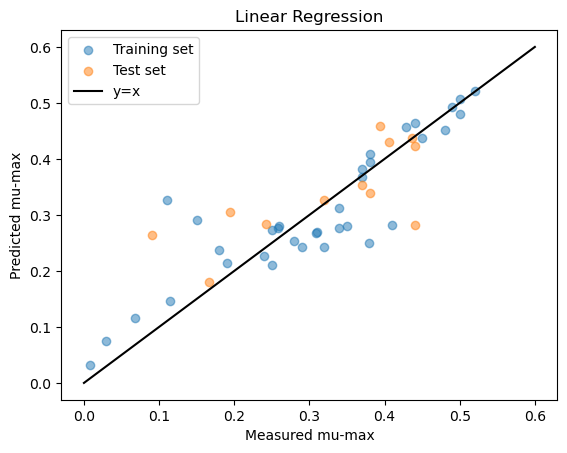

In [4]:
#Spilting 75% of dataset into training set and 25% into testing set
x_train, x_test, y_train, y_test = train_test_split(yeast_props.drop(columns=['mu-max (1/hr)']),
                                                    yeast_props['mu-max (1/hr)'], test_size=0.25, random_state=0)

#Define Linear Regression Model
lin_regr = LinearRegression()
lin_regr.fit(x_train,y_train)

lin_pred_train = lin_regr.predict(x_train)
lin_pred_test = lin_regr.predict(x_test)

lin_RMSE_train = mean_squared_error(y_train,lin_pred_train,squared=False)
lin_RMSE_test = mean_squared_error(y_test,lin_pred_test,squared=False)

true_lin_RMSE_train = (lin_RMSE_train * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_lin_RMSE_test = (lin_RMSE_test * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()

print('True training root mean squared error: %.2f'%true_lin_RMSE_train)
print('True testing root mean squared error: %.2f'%true_lin_RMSE_test)
print('Training R^2: %.2f' %lin_regr.score(x_train,y_train))
print('Testing R^2: %.2f' %lin_regr.score(x_test,y_test))

true_lin_pred_train = (lin_pred_train * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_lin_pred_test = (lin_pred_test * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_y_train = (y_train * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_y_test = (y_test * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()

for i in range(0, len(lin_regr.coef_)):
    print(property_list[i], lin_regr.coef_[i])
    
fig, ax = plt.subplots()

ax.scatter(true_y_train,true_lin_pred_train,alpha=0.5)
ax.scatter(true_y_test,true_lin_pred_test,alpha=0.5)
ax.plot(np.linspace(0,0.6,10),np.linspace(0, 0.6,10),'k-')
ax.set_xlabel('Measured mu-max')
ax.set_ylabel('Predicted mu-max')
ax.set_title('Linear Regression')
ax.legend(['Training set','Test set','y=x'])

fig.show
fig.savefig('LinearRegression.png', dpi=360)

True training root mean squared error: 0.42
True testing root mean squared error: 0.42
Training R^2: 0.34
Testing R^2: 0.08
T (C) 0.0498280367044299
pH -0.0
DO (%) 0.0
Glucose -0.0
Maltodextrin 0.0
Sugar Concentration (g/L) 0.23814822335616703


<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

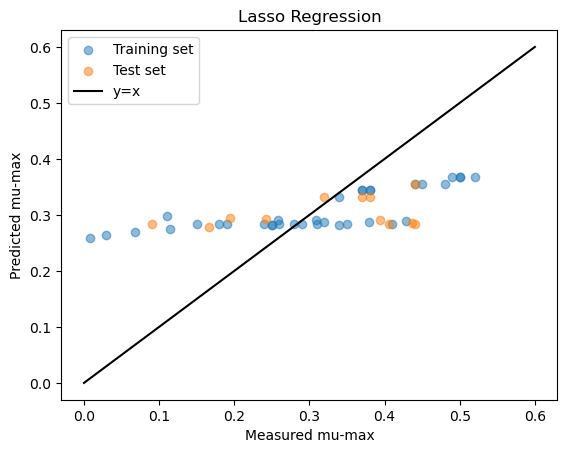

In [12]:
#Define LASSO Regression Model
lasso = Lasso(alpha=0.5)
lasso.fit(x_train,y_train)

lasso_pred_train = lasso.predict(x_train)
lasso_pred_test = lasso.predict(x_test)

lasso_RMSE_train = mean_squared_error(y_train,lasso_pred_train,squared=False)
lasso_RMSE_test = mean_squared_error(y_test,lasso_pred_test,squared=False)

true_lasso_RMSE_train = (lasso_RMSE_train * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_lasso_RMSE_test = (lasso_RMSE_test * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()

print('True training root mean squared error: %.2f'%true_lasso_RMSE_train)
print('True testing root mean squared error: %.2f'%true_lasso_RMSE_test)
print('Training R^2: %.2f' %lasso.score(x_train,y_train))
print('Testing R^2: %.2f' %lasso.score(x_test,y_test))

true_lasso_pred_train = (lasso_pred_train * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_lasso_pred_test = (lasso_pred_test * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()

for i in range(0, len(lasso.coef_)):
    print(property_list[i], lasso.coef_[i])
    
fig, ax = plt.subplots()

ax.scatter(true_y_train,true_lasso_pred_train,alpha=0.5)
ax.scatter(true_y_test,true_lasso_pred_test,alpha=0.5)
ax.plot(np.linspace(0,0.6,10),np.linspace(0, 0.6,10),'k-')
ax.set_xlabel('Measured mu-max')
ax.set_ylabel('Predicted mu-max')
ax.set_title('Lasso Regression')
ax.legend(['Training set','Test set','y=x'])

fig.savefig('LassoRegression.png', dpi=360)
fig.show

True training root mean squared error: 0.40
True testing root mean squared error: 0.41
Training R^2: 0.53
Testing R^2: 0.29
T (C) 0.1290318264978698
pH -0.059474911214514335
DO (%) 0.07866157044424994
Glucose -0.106123234248556
Maltodextrin 0.10612323424855598
Sugar Concentration (g/L) 0.12707681536260357


<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

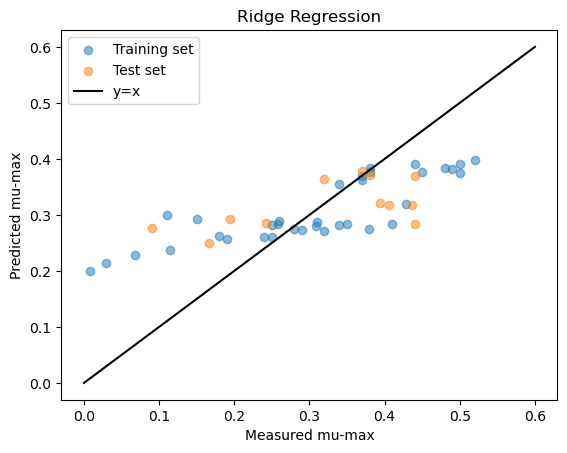

In [10]:
#Define Ridge Regression Model
ridge = Ridge(alpha=100)
ridge.fit(x_train,y_train)

ridge_pred_train = ridge.predict(x_train)
ridge_pred_test = ridge.predict(x_test)

ridge_RMSE_train = mean_squared_error(y_train,ridge_pred_train,squared=False)
ridge_RMSE_test = mean_squared_error(y_test,ridge_pred_test,squared=False)

true_ridge_RMSE_train = (ridge_RMSE_train * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_ridge_RMSE_test = (ridge_RMSE_test * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()

print('True training root mean squared error: %.2f'%true_ridge_RMSE_train)
print('True testing root mean squared error: %.2f'%true_ridge_RMSE_test)
print('Training R^2: %.2f' %ridge.score(x_train,y_train))
print('Testing R^2: %.2f' %ridge.score(x_test,y_test))

true_ridge_pred_train = (ridge_pred_train * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_ridge_pred_test = (ridge_pred_test * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()

for i in range(0, len(ridge.coef_)):
    print(property_list[i], ridge.coef_[i])
    
fig, ax = plt.subplots()

ax.scatter(true_y_train,true_ridge_pred_train,alpha=0.5)
ax.scatter(true_y_test,true_ridge_pred_test,alpha=0.5)
ax.plot(np.linspace(0,0.6,10),np.linspace(0, 0.6,10),'k-')
ax.set_xlabel('Measured mu-max')
ax.set_ylabel('Predicted mu-max')
ax.set_title('Ridge Regression')
ax.legend(['Training set','Test set','y=x'])

fig.savefig('RidgeRegression.png', dpi=360)
fig.show

True training root mean squared error: 0.32
True testing root mean squared error: 0.38
Training R^2: 0.99
Testing R^2: 0.69


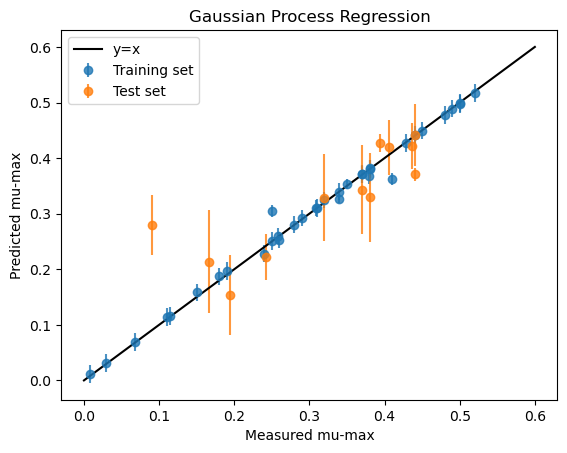

In [7]:
# Define the Gaussian Process model
matern_kernel = Matern(length_scale=1.0, nu=1.5)
gp_model = GaussianProcessRegressor(kernel=matern_kernel, alpha=0.015)

gp_model.fit(x_train, y_train)

gp_pred_train, gp_pred_train_std = gp_model.predict(x_train,return_std=True)
gp_pred_test, gp_pred_test_std = gp_model.predict(x_test,return_std=True)

gp_MSE_train = mean_squared_error(y_train,gp_pred_train)
gp_MSE_test = mean_squared_error(y_test,gp_pred_test)
gp_RMSE_train = mean_squared_error(y_train,gp_pred_train,squared=False)
gp_RMSE_test = mean_squared_error(y_test,gp_pred_test,squared=False)

true_gp_MSE_train = (gp_MSE_train * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_gp_MSE_test = (gp_MSE_test * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_gp_RMSE_train = (gp_RMSE_train * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_gp_RMSE_test = (gp_RMSE_test * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()

print('True training root mean squared error: %.2f'%true_gp_RMSE_train)
print('True testing root mean squared error: %.2f'%true_gp_RMSE_test)
print('Training R^2: %.2f' %gp_model.score(x_train,y_train))
print('Testing R^2: %.2f' %gp_model.score(x_test,y_test))

true_gp_pred_train = (gp_pred_train * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_gp_pred_test = (gp_pred_test * yeast["mu-max (1/hr)"].std()) + yeast["mu-max (1/hr)"].mean()
true_gp_pred_train_std = gp_pred_train_std * yeast["mu-max (1/hr)"].std()
true_gp_pred_test_std = gp_pred_test_std * yeast["mu-max (1/hr)"].std()
    
fig, ax = plt.subplots()

ax.errorbar(true_y_train,true_gp_pred_train,yerr=true_gp_pred_train_std, fmt='o', alpha=0.8)
ax.errorbar(true_y_test,true_gp_pred_test,yerr=true_gp_pred_test_std, fmt='o', alpha=0.8)
ax.plot(np.linspace(0,0.6,10),np.linspace(0, 0.6,10),'k-')
ax.set_xlabel('Measured mu-max')
ax.set_ylabel('Predicted mu-max')
ax.set_title('Gaussian Process Regression')
ax.legend(['y=x','Training set','Test set'])

fig.show
fig.savefig('GaussianProcess.png', dpi=360)